In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('C:\diabetic_data.csv')
pd.set_option('display.max_columns',None)
data.head()
df = pd.DataFrame(data)
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,?,?,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,?,?,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,?,?,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,?,?,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,?,?,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,?,?,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,?,?,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,?,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df['race'].replace({'Caucasian':'White','AfricanAmerican':'Black'},inplace=True)


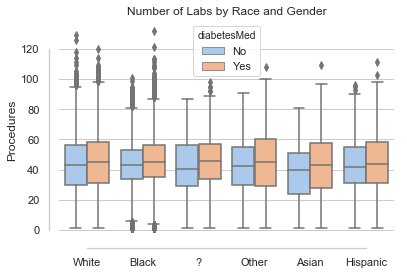

In [4]:
sns.set(style = "whitegrid")
ax = sns.boxplot( x = 'race',y = 'num_lab_procedures', hue ='diabetesMed', data = df, palette = 'pastel')
plt.title('Number of Labs by Race and Gender')
sns.despine(offset=10, trim=True)
ax.set(xlabel='',ylabel='Procedures')
plt.show()

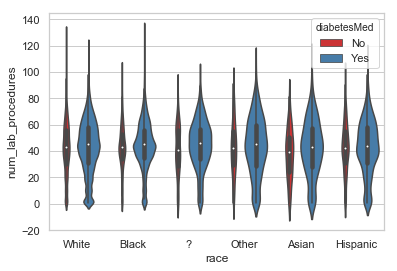

In [5]:
sns.set(style = "whitegrid")
ax = sns.violinplot(x="race",y="num_lab_procedures", hue="diabetesMed", data = df,
                    palette = "Set1",scale="count")


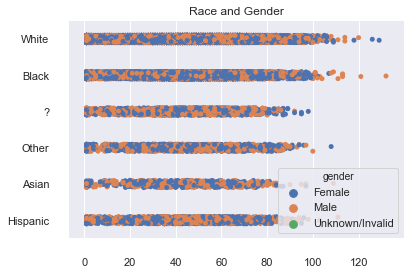

In [6]:
sns.set(style = "darkgrid")
ax = sns.stripplot(x="num_lab_procedures", y="race",hue='gender', data =df)
plt.title('Race and Gender')
sns.despine(offset=10, trim=True)
ax.set(xlabel='',ylabel='')
plt.show()

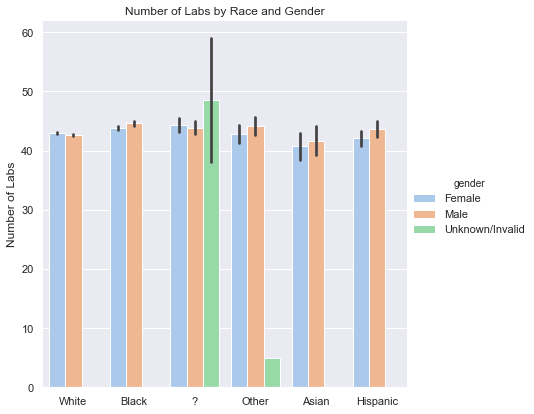

In [7]:
sns.set(style="darkgrid")
g = sns.catplot(x ='race', y ='num_lab_procedures', hue ='gender', data=df,
                height =6, kind ='bar', palette = 'pastel', ci=95)
g.despine(left=True)
g.set_ylabels('Number of Labs')
g.set_xlabels('')
plt.title('Number of Labs by Race and Gender')
plt.show()

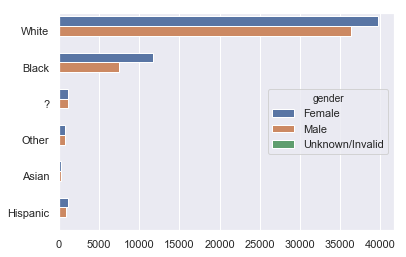

In [8]:
ax = sns.countplot(y= 'race', hue='gender',data=df)
ax.set(xlabel='',ylabel='')
plt.show()

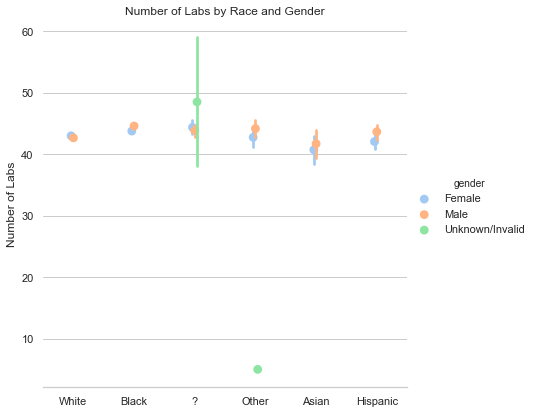

In [9]:
sns.set(style="whitegrid")
g = sns.catplot(x ='race', y ='num_lab_procedures', hue ='gender', data=df,
                height=6, kind ='point', palette = 'pastel', ci=95,dodge=True, join=False)
g.despine(left=True)
g.set_ylabels('Number of Labs')
g.set_xlabels('')
plt.title('Number of Labs by Race and Gender')
plt.show()

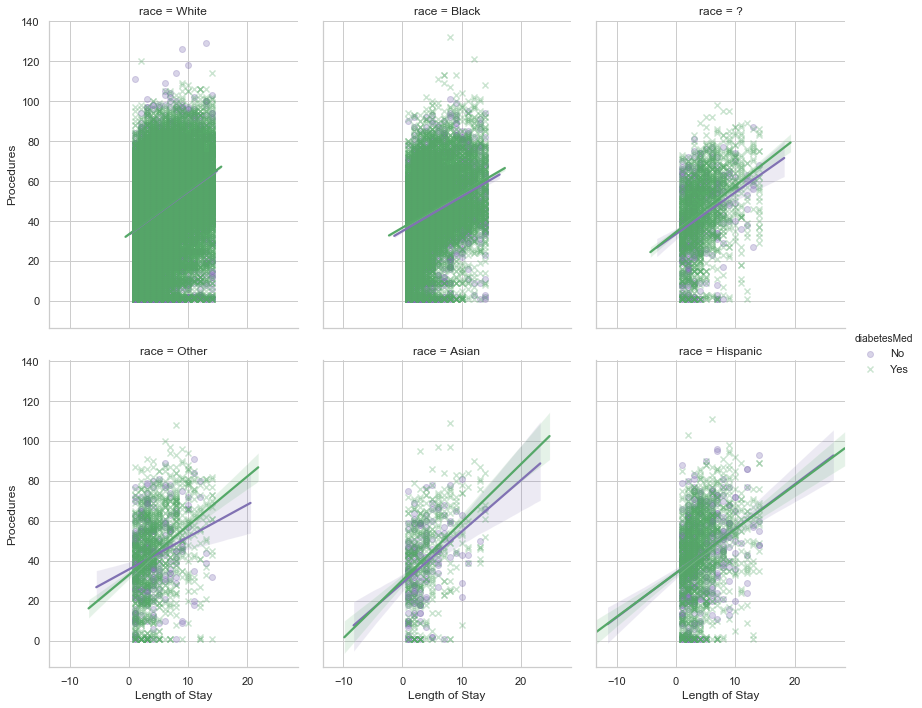

In [10]:
sns.set(style="whitegrid")
g = sns.lmplot(y='num_lab_procedures',
               x='time_in_hospital',
               data =df,
               palette = dict(Yes="g", No="m"),
               fit_reg = True,
               hue ="diabetesMed",
               markers = ["o","x"],
               col="race",
               col_wrap=3,
               aspect=.8,
               scatter_kws={'alpha':0.3})
g.set_ylabels('Procedures')
g.set_xlabels('Length of Stay')
plt.show()

# Chart explanation:

## The charts above provide a way to view the relationship between number of procedures and length of hospital by two factors: race and diabetes medication prescription.

### Among the groups, white patients and black patients distributions look most similar, the number of medical procedures,lengths of stay, and number of patients prescribed diabetes medicine. One interesting distinction between the two groups is white patients with the highest number of procedures were not, at the time, prescribed diabetes medicine. On the other hand, black patients with the highest number of procedure were at the time, presribed diabetes medicine. The data suggests Asian patients were at the hospital for the shortest amount of time, usually. 

### Most of the groups have a ***fit line*** which suggest over time, they will be prescribed diabetes medication. This trend is only unclear for white patients and hispanic patients. 
